# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(style = 'darkgrid') 

# Load Data set

In [3]:
# Loading data set "FuelConsumption"
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")

In [4]:
# top 5 rows of dataframe
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# checking for null values 
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
# checking the shape 
df.shape

(1067, 13)

In [7]:
# different stats parameter
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
# info of dataframe like data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# EDA

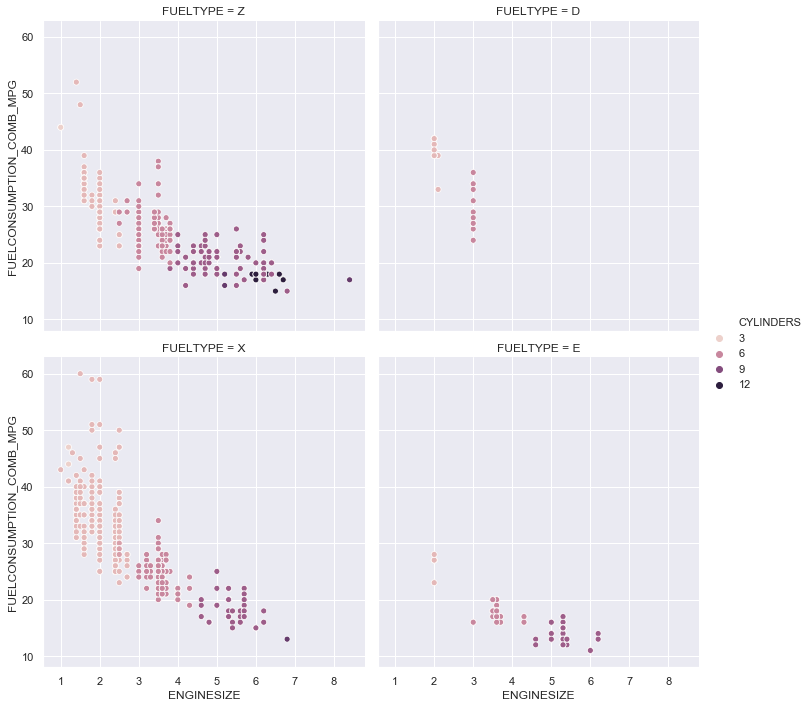

In [9]:
# ploting graphs  (for practice purspose I did all the plots )
sns.relplot(x='ENGINESIZE',y='FUELCONSUMPTION_COMB_MPG',data =df,hue ='CYLINDERS',col = 'FUELTYPE',col_wrap=2)

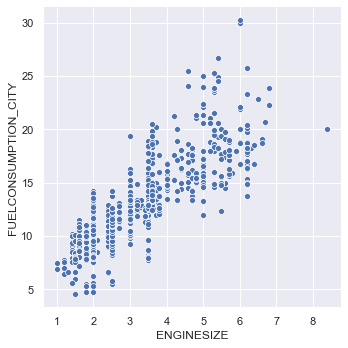

In [10]:
sns.relplot(x ='ENGINESIZE',y ='FUELCONSUMPTION_CITY',data = df)

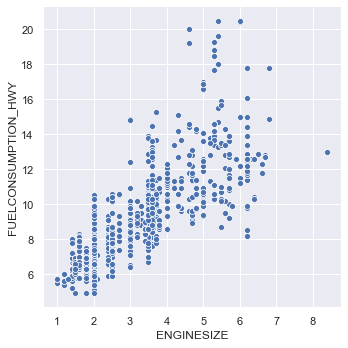

In [11]:
sns.relplot(x ='ENGINESIZE',y ='FUELCONSUMPTION_HWY',data = df)

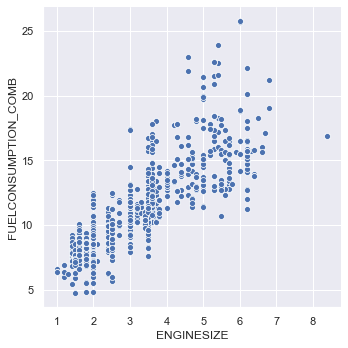

In [12]:
sns.relplot(x ='ENGINESIZE',y ='FUELCONSUMPTION_COMB',data = df)

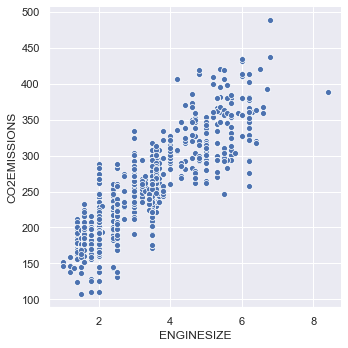

In [13]:
sns.relplot(x ='ENGINESIZE',y ='CO2EMISSIONS',data = df)

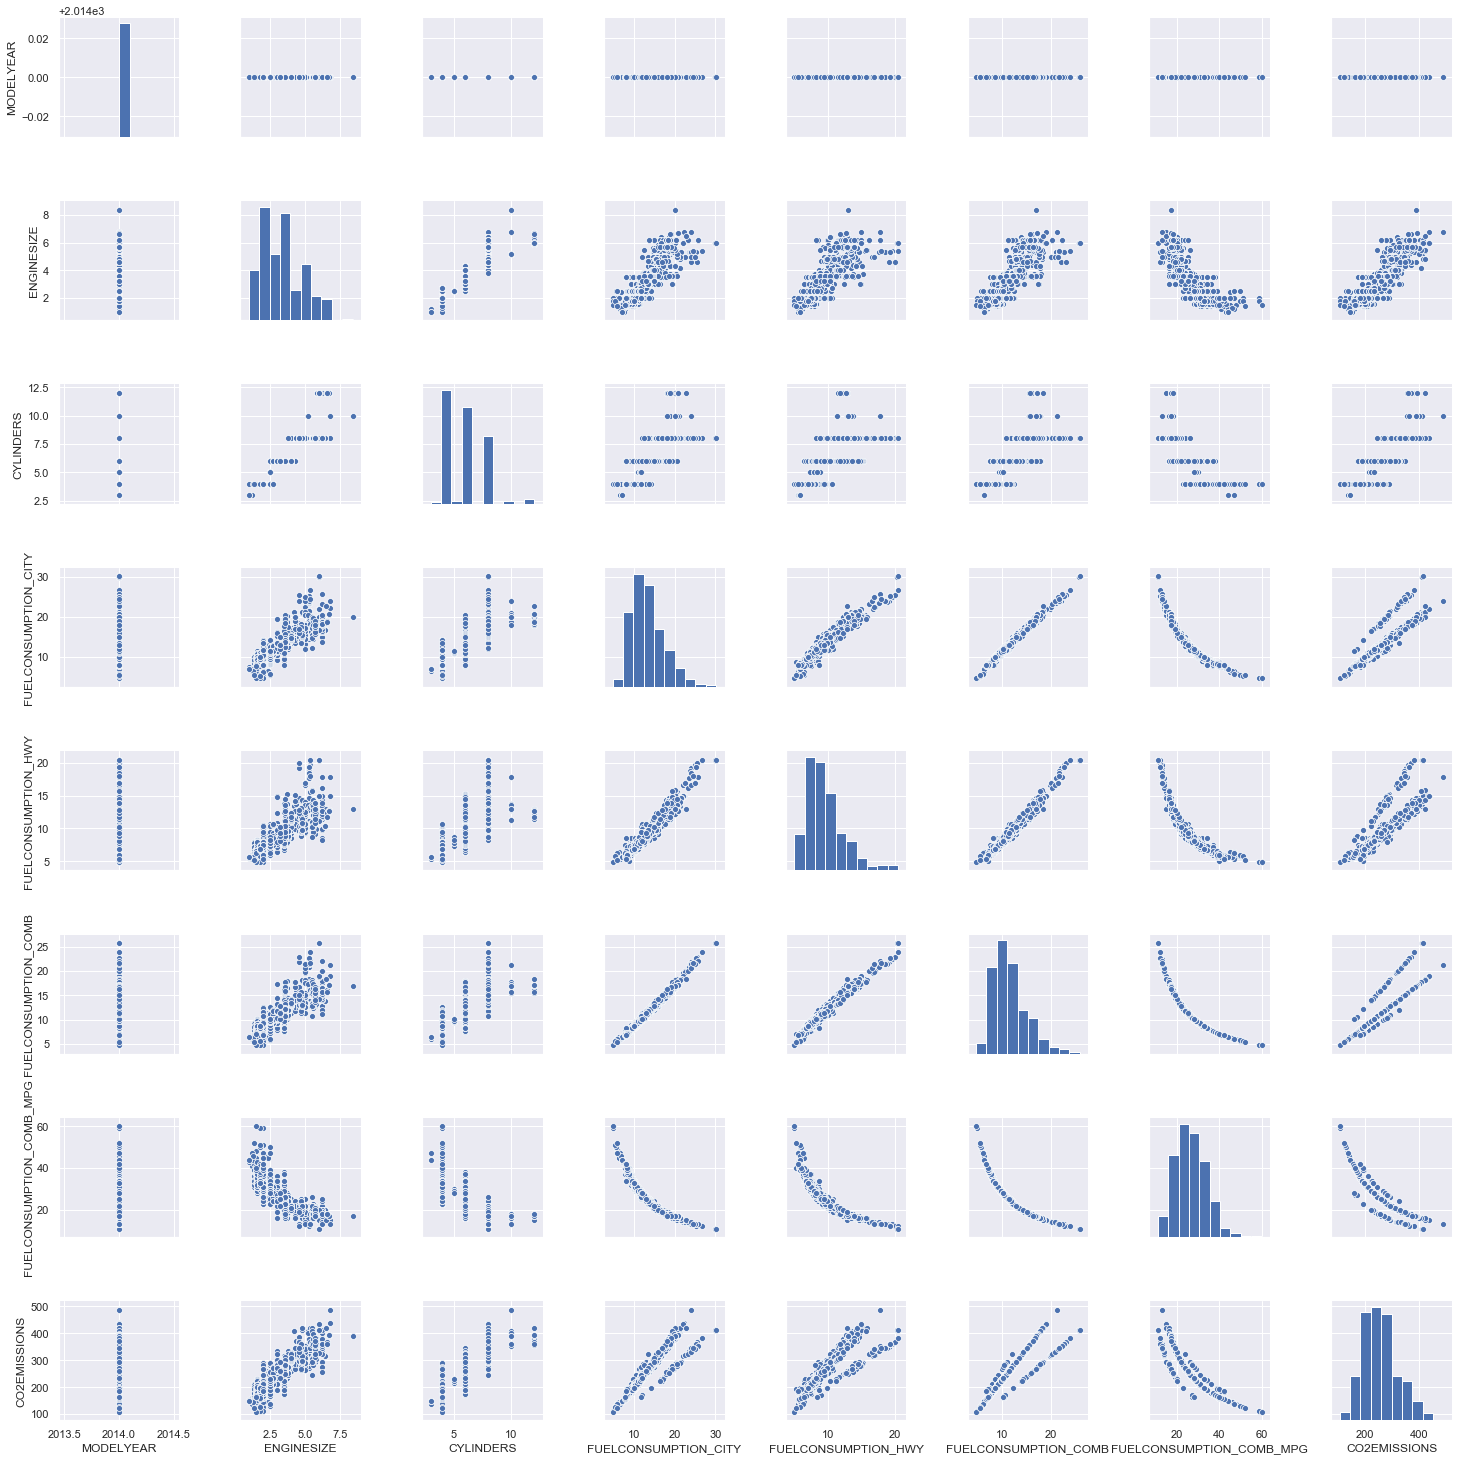

In [14]:
# pairplot for different variables in the dataframe
sns.pairplot(df)

# Setting Features(X) and target variable(y)

In [15]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [16]:
# different features 
X = df.loc[:,['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',
              'FUELCONSUMPTION_COMB_MPG']]

In [17]:
# target variable
y = df.loc[:,['CO2EMISSIONS']]

# Model testing for train and test 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

# Fit the model 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = LinearRegression()

In [21]:
# for Model X_train
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predict Model

In [22]:
# for X_train 
y_pred_train = model.predict(X_train)

In [23]:
actual_CO2EMISSIONS = y_train["CO2EMISSIONS"].values.reshape(-1,1)
df_c = pd.DataFrame(actual_CO2EMISSIONS)

# New Prediction and compasrison

In [24]:
predition_CO2EMISSIONS = y_pred_train
df_c["predition_CO2EMISSIONS"] = predition_CO2EMISSIONS
df_c.rename(columns = {0:"actual_CO2EMISSIONS"})

,actual_CO2EMISSIONS,predition_CO2EMISSIONS
0,193,192.847301
1,184,156.894452
2,218,216.667710
3,202,203.979899
4,202,198.977665
...,...,...
795,186,184.057646
796,285,270.659722
797,223,226.707159
798,368,336.678756


# MSE SCORE for X_train 

In [25]:
# MSE SCORE for X_train 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred_train)

422.79367692988194

# r2 score for X_train

In [26]:
# r2 score for X_train
r2_score(y_train,y_pred_train)

0.896519603990503

# X_ Test

In [27]:
# for X_test
model.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# for X_test
y_pred_test = model.predict(X_test)

# mse for X_test

In [29]:
# mse for X_test 
mean_squared_error(y_test,y_pred_test)

489.6063256631136

# r2 score for X_test

In [30]:
# r2 score for X_test
r2_score(y_test,y_pred_test)

0.8707628685754715

# Overall Error

In [31]:
# for X
overall_model = LinearRegression()
overall_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# prediction
y_pred_X = overall_model.predict(X)

In [33]:
# mse
overall_error = mean_squared_error(y,y_pred_X)
print(f"Overall error :{overall_error}")

Overall error :444.2156942385606
